In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

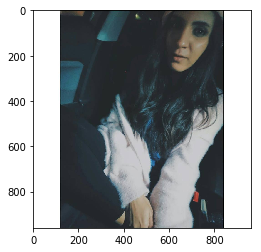

In [14]:
im = cv2.imread("./47324544_404682200072062_6894081989423398912_n.jpg")
plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))

In [9]:
def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
 
    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

/home/mgd-pc/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


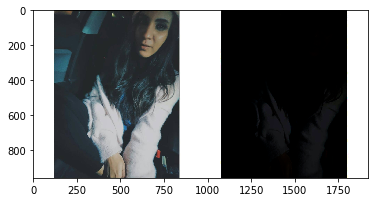

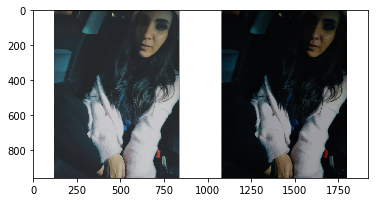

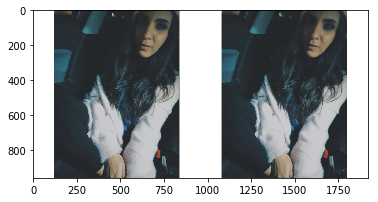

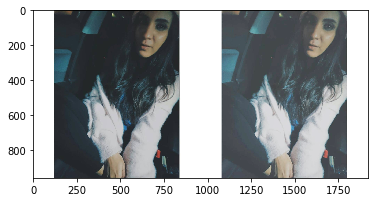

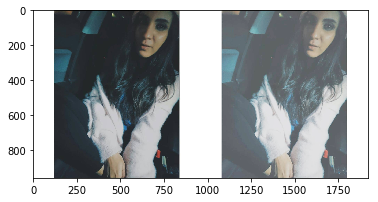

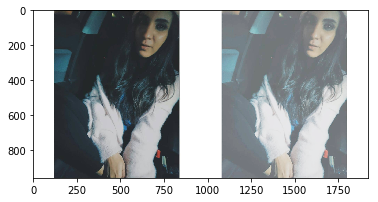

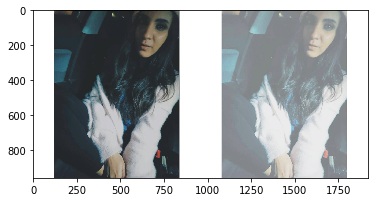

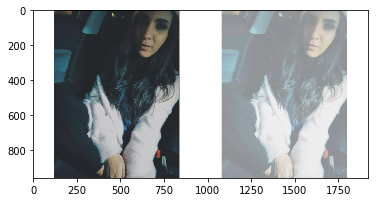

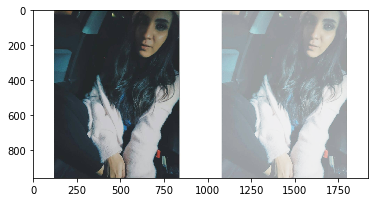

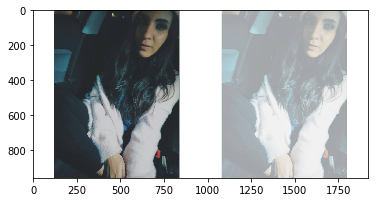

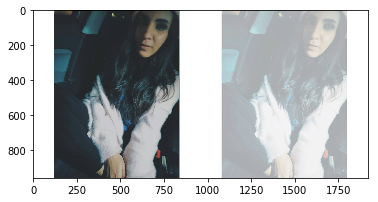

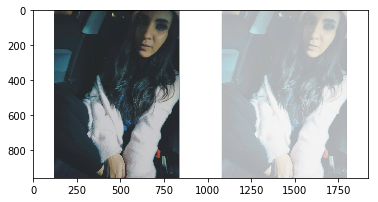

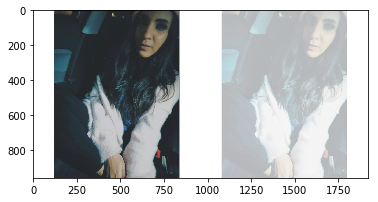

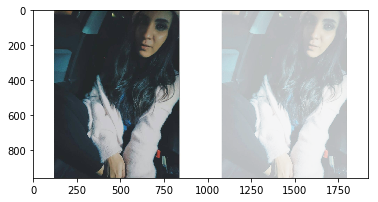

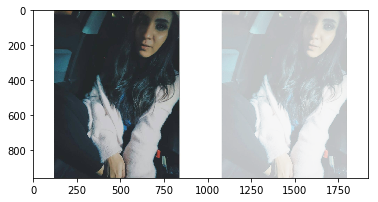

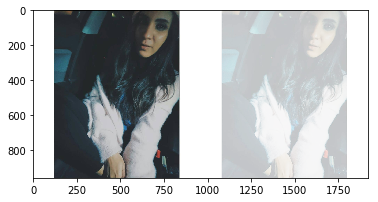

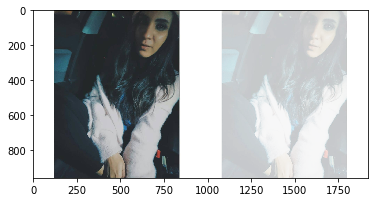

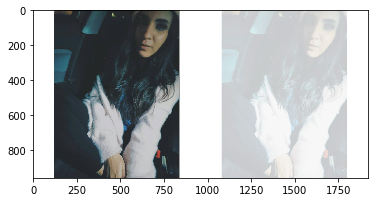

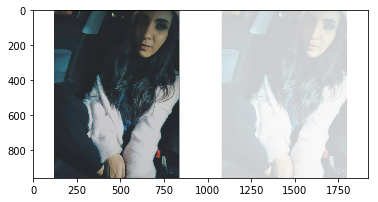

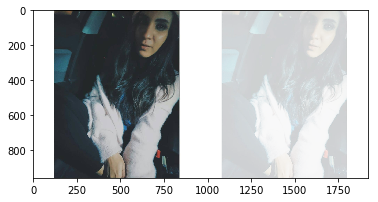

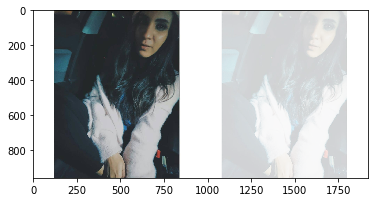

In [20]:
images = []
for gamma in np.arange(0.0, 10.5, 0.5):  
    gamma = gamma if gamma > 0 else 0.1
    adjusted = adjust_gamma(im, gamma=gamma)
    plt.figure()
    plt.imshow(cv2.cvtColor(np.hstack([im, adjusted]),cv2.COLOR_BGR2RGB))
    images.append(adjusted)

In [24]:
alignMTB = cv2.createAlignMTB()
alignMTB.process(images, images)

In [25]:
mergeMertens = cv2.createMergeMertens()
exposureFusion = mergeMertens.process(images)

In [28]:
plt.imshow(cv2.cvtColor(exposureFusion * 255,cv2.COLOR_BGR2RGB))

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7ff378811d90> (for post_execute):


ValueError: Floating point image RGB values must be in the 0..1 range.

ValueError: Floating point image RGB values must be in the 0..1 range.

In [29]:
  cv2.imwrite("exposure-fusion.jpg", exposureFusion * 255)


True